In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_excel('Data_.xlsx')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
df.shape

(5000, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [5]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [6]:
df['CreditCard'].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

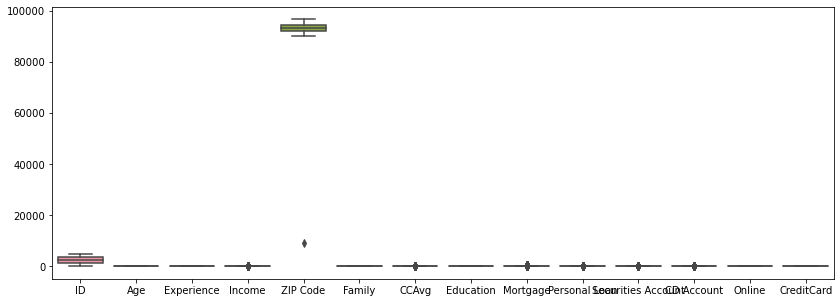

In [7]:
plt.figure(figsize=(14,5))
sns.boxplot(data = df)
plt.show

In [8]:
df['Personal Loan'].value_counts()/df.shape[0] * 100

0    90.4
1     9.6
Name: Personal Loan, dtype: float64

In [9]:
for i in df.columns:
    print(df[i].value_counts())
    print()

2047    1
2608    1
4647    1
2600    1
553     1
       ..
3263    1
1218    1
3267    1
1222    1
2049    1
Name: ID, Length: 5000, dtype: int64

35    151
43    149
52    145
58    143
54    143
50    138
41    136
30    136
56    135
34    134
39    133
59    132
57    132
51    129
60    127
45    127
46    127
42    126
40    125
31    125
55    125
62    123
29    123
61    122
44    121
32    120
33    120
48    118
38    115
49    115
47    113
53    112
63    108
36    107
37    106
28    103
27     91
65     80
64     78
26     78
25     53
24     28
66     24
23     12
67     12
Name: Age, dtype: int64

 32    154
 20    148
 9     147
 5     146
 23    144
 35    143
 25    142
 28    138
 18    137
 19    135
 26    134
 24    131
 3     129
 14    127
 16    127
 30    126
 34    125
 27    125
 17    125
 29    124
 22    124
 7     121
 8     119
 6     119
 15    119
 10    118
 33    117
 13    117
 11    116
 37    116
 36    114
 21    113
 4     113
 31    104
 12

In [10]:
df['Age'][df['Experience']==2].value_counts()

28    29
26    27
27    20
29     7
32     2
Name: Age, dtype: int64

In [11]:
df['Age'][df['Education']==3].value_counts()

54    63
41    50
43    49
42    48
56    47
55    45
53    45
39    43
44    43
62    42
40    42
58    41
63    40
57    40
61    37
52    37
38    37
35    37
46    37
60    36
30    35
29    35
45    35
50    35
59    34
51    33
34    33
33    33
31    33
64    30
36    29
48    28
49    28
27    28
65    27
47    27
37    27
32    26
26    24
28    22
25    19
66    10
24     7
67     4
Name: Age, dtype: int64

In [12]:
df['Education'].value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [13]:
df['Experience'].replace(to_replace=[-1, -2, -3], value=2, inplace=True)

In [14]:
df['Experience'].value_counts()

32    154
20    148
9     147
5     146
23    144
35    143
25    142
28    138
2     137
18    137
19    135
26    134
24    131
3     129
16    127
14    127
30    126
27    125
17    125
34    125
29    124
22    124
7     121
6     119
8     119
15    119
10    118
33    117
13    117
37    116
11    116
36    114
21    113
4     113
31    104
12    102
38     88
39     85
1      74
0      66
40     57
41     43
42      8
43      3
Name: Experience, dtype: int64

- There are no negative experiences.

In [15]:
from sklearn.impute import KNNImputer

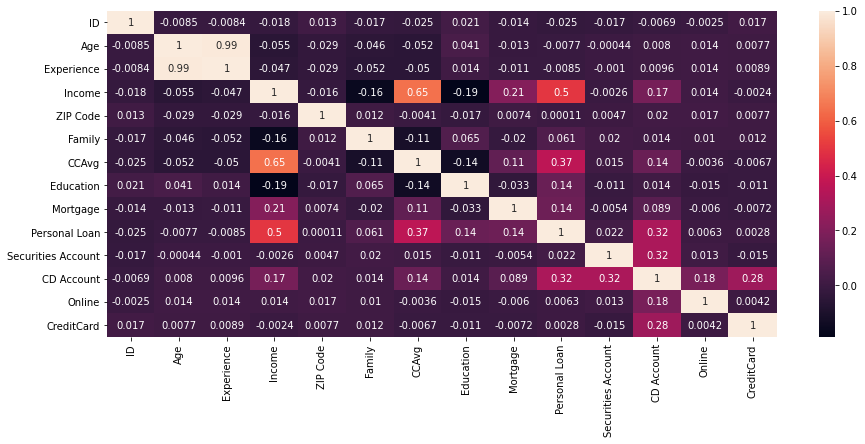

In [16]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [33]:
df['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [17]:
X = df.drop(['ID', 'ZIP Code'], axis=1)

In [18]:
y = df['Personal Loan']

In [19]:
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.preprocessing import StandardScaler

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3500, 12)
(1500, 12)
(3500,)
(1500,)


In [36]:
!pip install imblearn

  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
  Using cached imbalanced_learn-0.7.0-py3-none-any.whl (167 kB)


In [37]:
from imblearn.over_sampling import SMOTE

In [39]:
sm = SMOTE(k_neighbors=5, random_state=1)
X_bal, y_bal = sm.fit_resample(X, y)
print(X_bal.shape)
print(y_bal.shape)

(9040, 12)
(9040,)


In [40]:
y_bal.value_counts()

1    4520
0    4520
Name: Personal Loan, dtype: int64

In [41]:
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_bal, y_bal, test_size=0.3, random_state=42, stratify=y_bal)

### Model1 : Logistic Regression

#### Logit Results

In [42]:
import statsmodels.api as sm

Xc = sm.add_constant(X_bal)
Xc

,const,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1.0,25,1,49,4,1.600000,1,0,0,1,0,0,0
1,1.0,45,19,34,3,1.500000,1,0,0,1,0,0,0
2,1.0,39,15,11,1,1.000000,1,0,0,0,0,0,0
3,1.0,35,9,100,1,2.700000,2,0,0,0,0,0,0
4,1.0,35,8,45,4,1.000000,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9035,1.0,47,22,160,2,4.105395,3,250,1,0,0,0,0
9036,1.0,62,36,169,2,6.699516,3,103,1,0,1,1,0
9037,1.0,48,24,130,1,1.123218,2,0,1,0,0,1,0
9038,1.0,55,31,103,3,3.783461,2,0,1,0,0,0,0


In [44]:
model = sm.Logit(y_bal, Xc).fit(method='bfgs')
model.summary()

         Current function value: 0.001347
         Iterations: 35
         Function evaluations: 40
         Gradient evaluations: 40


F:\Anaconda_3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 9040
Model:                          Logit   Df Residuals:                     9027
Method:                           MLE   Df Model:                           12
Date:                Tue, 28 Jul 2020   Pseudo R-squ.:                  0.9981
Time:                        16:47:26   Log-Likelihood:                -12.173
converged:                      False   LL-Null:                       -6266.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.4762      8.852     -0.054      0.957     -17.826      16.873
Age                   -1.0699      0.373     -2.868      0.004      -1.801      -0.339
Experience             1.0655      0.374      2.845      0.004       0.332       1.800
Income                 0.0360      0.014      2.661      0.008       0.009       0.063
Family                 1.2883      0.441      2.918      0.004       0.423       2.153
CCAvg                  1.1272      0.379      2.973      0.003       0.384       1.870
Education              5.0687      1.450      3.496      0.000       2.227       7.910
Mortgage              -0.0013      0.003     -0.415      0.678      -0.007       0.005
Personal Loan         22.4867      3.514      6.399      0.000      15.600      29.374
Securities Account    -1.4220      1.376     -1.034      0.301      -4.119       1.275
CD Account             1.4280      2.121      0.673      0.501      -2.729       5.585
Online                -3.9225      1.362     -2.881      0.004      -6.591      -1.254
CreditCard            -3.7026      1.654     -2.239      0.025      -6.944      -0.461
======================================================================================

Possibly complete quasi-separation: A fraction 0.86 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [54]:
lr = LogisticRegression(max_iter=5000)
lr.fit(X_train_sm, y_train_sm)
y_pred = lr.predict(X_test_sm)

In [55]:
accuracy = accuracy_score(y_test_sm, y_pred)
print("Accuracy score: {0:.2f}".format(accuracy))
print("Train score: {0:0.2f}".format(lr.score(X_train_sm, y_train_sm)))
print("Test score: {0:0.2f}".format(lr.score(X_test_sm, y_test_sm)))

Accuracy score: 1.00
Train score: 1.00
Test score: 1.00


In [56]:
print(classification_report(y_test_sm, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1356
           1       1.00      1.00      1.00      1356

    accuracy                           1.00      2712
   macro avg       1.00      1.00      1.00      2712
weighted avg       1.00      1.00      1.00      2712



In [57]:
print(confusion_matrix(y_test_sm, y_pred))

[[1356    0]
 [   0 1356]]


In [73]:
prob=lr.predict_proba(X_test_sm)
prob_1=prob[:,1]
ypred1=np.zeros([len(y_test_sm),1])
for i in [0.2,0.3,0.4,0.5,0.6,0.8]:
    ypred1=np.zeros([len(y_test_sm),1])
    ypred1[prob_1>=i]=1
    print("The report for Th = ",i)
    print(confusion_matrix(y_test_sm,ypred1))
    print(classification_report(y_test_sm,ypred1))

The report for Th =  0.2
[[1356    0]
 [   0 1356]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1356
           1       1.00      1.00      1.00      1356

    accuracy                           1.00      2712
   macro avg       1.00      1.00      1.00      2712
weighted avg       1.00      1.00      1.00      2712

The report for Th =  0.3
[[1356    0]
 [   0 1356]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1356
           1       1.00      1.00      1.00      1356

    accuracy                           1.00      2712
   macro avg       1.00      1.00      1.00      2712
weighted avg       1.00      1.00      1.00      2712

The report for Th =  0.4
[[1356    0]
 [   0 1356]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1356
           1       1.00      1.00      1.00      1356

    accuracy              

### Model2: Decision Tree

In [74]:
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split( X_bal, y_bal, test_size=0.30, random_state=42)

In [79]:
dt = DecisionTreeClassifier()
dt.fit(X_train_sm, y_train_sm)
y_pred = dt.predict(X_test_sm)

In [81]:
accuracy = accuracy_score(y_test_sm, y_pred)
print("Accuracy score: {0:.2f}".format(accuracy))
print("Train score: {0:0.2f}".format(lr.score(X_train_sm, y_train_sm)))
print("Test score: {0:0.2f}".format(lr.score(X_test_sm, y_test_sm)))

Accuracy score: 1.00
Train score: 1.00
Test score: 1.00


In [82]:
print(classification_report(y_test_sm, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1383
           1       1.00      1.00      1.00      1329

    accuracy                           1.00      2712
   macro avg       1.00      1.00      1.00      2712
weighted avg       1.00      1.00      1.00      2712



In [83]:
print(confusion_matrix(y_test_sm, y_pred))

[[1383    0]
 [   0 1329]]


### Hyperparameter Tuning

In [138]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [140]:
params = {'max_depth': range(5, 20, 5), 'min_samples_leaf': range(20, 100, 20), 'min_samples_split':range(20,100,20),
         'criterion':['gini', 'entropy']}

In [141]:
dt_mod = DecisionTreeClassifier()
fin_mod = GridSearchCV(dt_mod, param_grid=params, scoring='f1', return_train_score=True)

In [142]:
fin_mod.fit(X_train_sm, y_train_sm)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(5, 20, 5),
                         'min_samples_leaf': range(20, 100, 20),
                         'min_samples_split': range(20, 100, 20)},
             return_train_score=True, scoring='f1')

In [143]:
fin_mod.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 20,
 'min_samples_split': 20}

In [144]:
fin_mod.best_score_

1.0

In [ ]:
fin_mod = RandomForestClassifier(**tun_mod.best_params_, oob_score=True)

In [145]:
final_model = DecisionTreeClassifier(**fin_mod.best_params_)

In [146]:
final_model.fit(X_train_sm, y_train_sm)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=20, min_samples_split=20)

In [147]:
y_pred = final_model.predict(X_test_sm)
y_pred_train = final_model.predict(X_train_sm)

In [148]:
print(classification_report(y_test_sm,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1383
           1       1.00      1.00      1.00      1329

    accuracy                           1.00      2712
   macro avg       1.00      1.00      1.00      2712
weighted avg       1.00      1.00      1.00      2712



### Model 3: Random Forest

In [85]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=42)

In [86]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [87]:
print("Accuracy score: {}".format(accuracy_score(y_test, y_pred)))
print("Train score: {}".format(rf.score(X_train, y_train)))
print("Test score: {}".format(rf.score(X_test, y_test)))

Accuracy score: 1.0
Train score: 1.0
Test score: 1.0


In [88]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1343
           1       1.00      1.00      1.00       157

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500



In [89]:
print(confusion_matrix(y_test, y_pred))

[[1343    0]
 [   0  157]]


#### Tuning and Hyperparameters

In [90]:
params = {'n_estimators':[20,30,40,50,60], 'ccp_alpha':[0.1, 0.15], 'max_features':['auto','sqrt','log2'],
         'criterion':['gini', 'entropy']}

In [91]:
from sklearn.model_selection import GridSearchCV

In [93]:
rf_mod1 = RandomForestClassifier()
hyp_mod = GridSearchCV(rf_mod1, param_grid=params, scoring='f1', return_train_score=True)

In [95]:
tun_mod = hyp_mod.fit(X_train, y_train)

In [96]:
tun_mod.best_params_

{'ccp_alpha': 0.1,
 'criterion': 'entropy',
 'max_features': 'log2',
 'n_estimators': 60}

In [97]:
tun_mod.best_estimator_

RandomForestClassifier(ccp_alpha=0.1, criterion='entropy', max_features='log2',
                       n_estimators=60)

In [99]:
tun_mod.best_score_

0.9726406729029143

In [100]:
cvres = pd.DataFrame(hyp_mod.cv_results_)
cvres.shape

(60, 24)

In [107]:
cvres[cvres['rank_test_score']==1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,param_criterion,param_max_features,param_n_estimators,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
29,0.206907,0.002191,0.017389,0.00049,0.1,entropy,log2,60,"{'ccp_alpha': 0.1, 'criterion': 'entropy', 'ma...",0.992126,...,0.972641,0.021031,1,0.959839,0.988281,0.986248,0.963855,0.97006,0.973657,0.011596


In [109]:
fin_mod = RandomForestClassifier(**tun_mod.best_params_, oob_score=True)

In [111]:
fin_mod.fit(X_train_sm, y_train_sm)

RandomForestClassifier(ccp_alpha=0.1, criterion='entropy', max_features='log2',
                       n_estimators=60, oob_score=True)

In [112]:
y_pred = fin_mod.predict(X_test_sm)
y_pred_train = fin_mod.predict(X_train_sm)

In [113]:
print(classification_report(y_test_sm,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1383
           1       1.00      1.00      1.00      1329

    accuracy                           1.00      2712
   macro avg       1.00      1.00      1.00      2712
weighted avg       1.00      1.00      1.00      2712



In [115]:
fin_mod.oob_score_

0.9985777496839444

### Model 4: Bagging Model

In [119]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score, KFold

In [117]:
clf1 = DecisionTreeClassifier(random_state=0)
clf2 = KNeighborsClassifier(n_neighbors=5)

In [118]:
bagging1 = BaggingClassifier(base_estimator=clf1, n_estimators=10, max_samples=0.8, oob_score=True, random_state=0)
bagging2 = BaggingClassifier(base_estimator=clf2, n_estimators=10, max_samples=0.8, oob_score=True, random_state=0)

In [123]:
import warnings
warnings.simplefilter("ignore")

In [124]:
kf = KFold(n_splits=5, shuffle=True, random_state=0)
score1 = cross_val_score(clf1, X_bal, y_bal, cv=kf, scoring='accuracy')
score2 = cross_val_score(bagging1, X_bal, y_bal, cv=kf, scoring='accuracy')
score3 = cross_val_score(bagging2, X_bal, y_bal, cv=kf, scoring='accuracy')

In [125]:
np.mean(score1), np.std(score1)

(1.0, 0.0)

In [126]:
np.mean(score2), np.std(score2)

(1.0, 0.0)

In [127]:
np.mean(score3), np.std(score3)

(0.922787610619469, 0.004687969048764818)